In [20]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [21]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [22]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#檢視資料中各個欄位類型的數量
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [24]:
#檢視資料中類別型欄位各自類別的數量
app_train.select_dtypes(include=["float64"]).apply(pd.Series.nunique, axis = 0)

AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
REGION_POPULATION_RELATIVE          81
DAYS_REGISTRATION                15688
OWN_CAR_AGE                         62
CNT_FAM_MEMBERS                     17
EXT_SOURCE_1                    114584
EXT_SOURCE_2                    119831
EXT_SOURCE_3                       814
APARTMENTS_AVG                    2339
BASEMENTAREA_AVG                  3780
YEARS_BEGINEXPLUATATION_AVG        285
YEARS_BUILD_AVG                    149
COMMONAREA_AVG                    3181
ELEVATORS_AVG                      257
ENTRANCES_AVG                      285
FLOORSMAX_AVG                      403
FLOORSMIN_AVG                      305
LANDAREA_AVG                      3527
LIVINGAPARTMENTS_AVG              1868
LIVINGAREA_AVG                    5199
NONLIVINGAPARTMENTS_AVG            386
NONLIVINGAREA_AVG                 3290
APARTMENTS_MODE          

In [25]:
#檢視資料中類別型欄位各自類別的數量
app_train.select_dtypes(include=["int64"]).apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMEN

In [26]:
#https://question.itread01.com/xppfc.html
print(app_train.shape)
print("樣本數量：",app_train.shape[0])
print("特徵數量(含TARGET[label]):",app_train.shape[1])

(307511, 122)
樣本數量： 307511
特徵數量(含TARGET[label]): 122


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


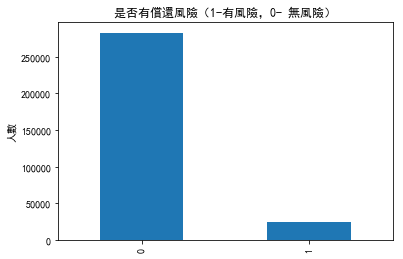

In [28]:
#https://www.itread01.com/content/1545004632.html
# 1.根據TARGET在不同分類下的數量繪製整體風險直方圖
#TARGET 0:按時還款沒有違約，無風險
#TARGET １:不能按時還款，有風險
plt.rcParams['font.sans-serif']=['SimHei'] #用來正常顯示中文標籤
plt.rcParams['axes.unicode_minus']=False #用來正常顯示負號


app_train.TARGET.value_counts().plot(kind='bar')
plt.title("是否有償還風險（1-有風險，0- 無風險）")
plt.ylabel("人數")
plt.show()

In [29]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

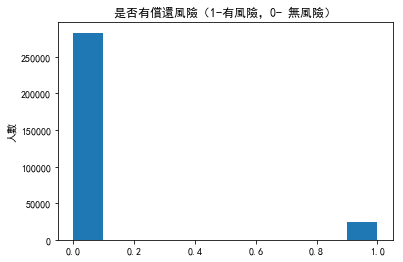

In [30]:
app_train['TARGET'].astype(int).plot.hist()
plt.title("是否有償還風險（1-有風險，0- 無風險）")
plt.ylabel("人數")
plt.show()

In [34]:
#將app_train依據'TARGET'內容做分類
target = app_train.groupby('TARGET')

In [37]:
#可以得到，能分成target=0與target=1兩類，與其數量
target.size()

TARGET
0    282686
1     24825
dtype: int64

In [39]:
#target.get_group(0)
target.get_group(0).head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [40]:
target0=target.get_group(0)
target1=target.get_group(1)

In [41]:
print('target=0之AMT_ANNUITY平均值為',target0['AMT_ANNUITY'].mean())

target=0之AMT_ANNUITY平均值為 27163.62334880463


In [42]:
print('target=0之AMT_ANNUITY標準差為',target0['AMT_ANNUITY'].std())

target=0之AMT_ANNUITY標準差為 14658.307177611694
